In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from os import path as osp
%matplotlib inline

In [2]:
sns.set()

In [4]:
baseline_dir = '../contrastive_vm/contrastive'
candidate_dir = '../batch_regularizer_vm/batch_regularizer'

# Does the change provide better MAPR?

Baseline MAP@R: [0.253, 0.262]

Batch reg MAP@R: [0.257, 0.262] 

## Not significant

# Does the change provide faster bayesian optimization?

Maybe. The optimization plots are much better for the candidate.

Baseline:

Candidate:

# Does the change provide better convergence?

No, no difference observed.

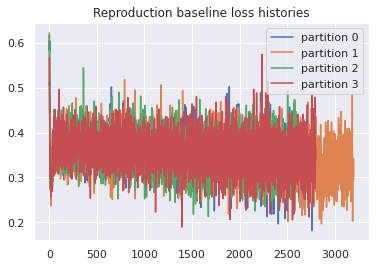

In [34]:
def get_reproduction_dirs(root):
    return [fname for fname in os.listdir(root) if 'reproduction' in fname]

def get_repr_csvs(root, csv_name):
    dfs = []
    for repr_dir in get_reproduction_dirs(root):
        repr_path = osp.join(root, repr_dir)

        repr_dfs = []
        for partition in range(0, 4):
            part_path = osp.join(repr_path, f'Test50_50_Partitions4_{partition}')

            df = pd.read_csv(osp.join(part_path, 'saved_csvs', csv_name))
            repr_dfs.append(df)
        dfs.append(repr_dfs)
    return dfs

def get_repr_loss_histories(root):
    return get_repr_csvs(root, 'loss_histories.csv')

loss_hists = get_repr_loss_histories(baseline_dir)

plt.figure()
for i, df in enumerate(loss_hists[0]):
    sns.lineplot(data=df['total_loss'], label=f'partition {i}')
plt.legend()
plt.title('Reproduction baseline loss histories')
plt.show()

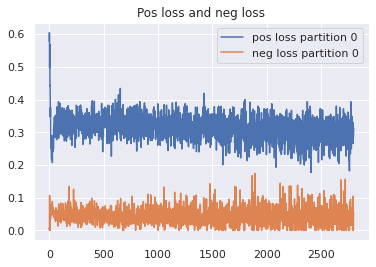

In [41]:
neg_loss_csv = 'metric_loss_ContrastiveLoss_reducer_MultipleReducers_reducers_ModuleDict_neg_loss_AvgNonZeroReducer.csv'
pos_loss_csv = 'metric_loss_ContrastiveLoss_reducer_MultipleReducers_reducers_ModuleDict_pos_loss_AvgNonZeroReducer.csv'

dfs_neg_loss = get_repr_csvs(baseline_dir, neg_loss_csv)
dfs_pos_loss = get_repr_csvs(baseline_dir, pos_loss_csv)

reproduction = 0
plt.figure()
for i, df in enumerate(dfs_pos_loss[reproduction]):
    sns.lineplot(data=df['pos_loss'], label=f'pos loss partition {i}')
    sns.lineplot(data=dfs_neg_loss[reproduction][i]['neg_loss'], label=f'neg loss partition {i}')
    break
plt.legend()
plt.title('Pos loss and neg loss')
plt.show()

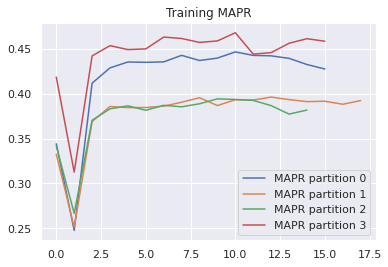

In [50]:
accuracies_val = 'accuracies_normalized_compared_to_self_GlobalEmbeddingSpaceTester_level_0_VAL.csv'
accuracies_dfs = get_repr_csvs(baseline_dir, accuracies_val)

plt.figure()
for i, df in enumerate(accuracies_dfs[reproduction]):
    sns.lineplot(data=df['mean_average_precision_at_r_level0'], label=f'MAPR partition {i}')
plt.legend()
plt.title('Training MAPR')
plt.show()

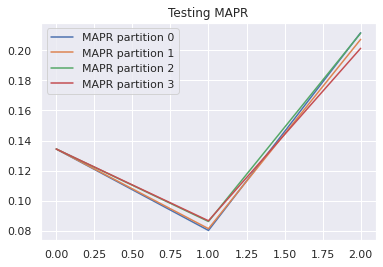

In [52]:
accuracies_test = 'accuracies_normalized_compared_to_self_GlobalEmbeddingSpaceTester_level_0_TEST.csv'
accuracies_dfs = get_repr_csvs(baseline_dir, accuracies_test)

plt.figure()
for i, df in enumerate(accuracies_dfs[reproduction]):
    sns.lineplot(data=df['mean_average_precision_at_r_level0'], label=f'MAPR partition {i}')
plt.legend()
plt.title('Testing MAPR')
plt.show()

## Candidate

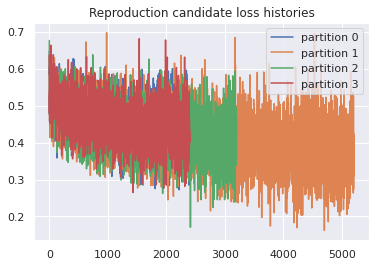

In [54]:
loss_hists = get_repr_loss_histories(candidate_dir)

plt.figure()
for i, df in enumerate(loss_hists[reproduction]):
    sns.lineplot(data=df['total_loss'], label=f'partition {i}')
plt.legend()
plt.title('Reproduction candidate loss histories')
plt.show()

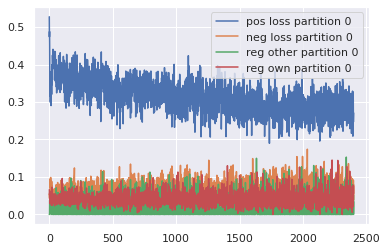

In [55]:
candidate_csv = 'metric_loss_ContrastiveLossRegularized_reducer_MultipleReducers_reducers_ModuleDict_neg_loss_AvgNonZeroReducer.csv'
dfs_neg_loss = get_repr_csvs(candidate_dir, candidate_csv)[reproduction]

candidate_csv = 'metric_loss_ContrastiveLossRegularized_reducer_MultipleReducers_reducers_ModuleDict_pos_loss_AvgNonZeroReducer.csv'
dfs_pos_loss = get_repr_csvs(candidate_dir, candidate_csv)[reproduction]

candidate_csv = 'metric_loss_ContrastiveLossRegularized_reducer_MultipleReducers_reducers_ModuleDict_reg_other_centroids_AvgNonZeroReducer.csv'
dfs_reg_other_loss = get_repr_csvs(candidate_dir, candidate_csv)[reproduction]

candidate_csv = 'metric_loss_ContrastiveLossRegularized_reducer_MultipleReducers_reducers_ModuleDict_reg_own_centroid_AvgNonZeroReducer.csv'
dfs_reg_own_loss = get_repr_csvs(candidate_dir, candidate_csv)[reproduction]

plt.figure()
for i, df in enumerate(dfs_pos_loss):
    sns.lineplot(data=df['pos_loss'], label=f'pos loss partition {i}')
    sns.lineplot(data=dfs_neg_loss[i]['neg_loss'], label=f'neg loss partition {i}')
    sns.lineplot(data=dfs_reg_other_loss[i]['reg_other_centroids'], label=f'reg other partition {i}')
    sns.lineplot(data=dfs_reg_own_loss[i]['reg_own_centroid'], label=f'reg own partition {i}')
    break
plt.legend()
plt.show()

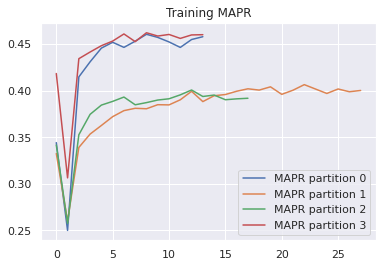

In [56]:
accuracies_val = 'accuracies_normalized_compared_to_self_GlobalEmbeddingSpaceTester_level_0_VAL.csv'
accuracies_dfs = get_repr_csvs(candidate_dir, accuracies_val)

plt.figure()
for i, df in enumerate(accuracies_dfs[reproduction]):
    sns.lineplot(data=df['mean_average_precision_at_r_level0'], label=f'MAPR partition {i}')
plt.legend()
plt.title('Training MAPR')
plt.show()

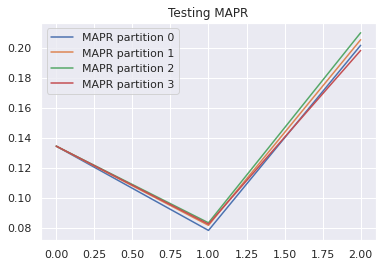

In [57]:
accuracies_test = 'accuracies_normalized_compared_to_self_GlobalEmbeddingSpaceTester_level_0_TEST.csv'
accuracies_dfs = get_repr_csvs(candidate_dir, accuracies_test)

plt.figure()
for i, df in enumerate(accuracies_dfs[reproduction]):
    sns.lineplot(data=df['mean_average_precision_at_r_level0'], label=f'MAPR partition {i}')
plt.legend()
plt.title('Testing MAPR')
plt.show()